Bạn có thể Download Dataset tại đây: https://www.kaggle.com/abecklas/fifa-world-cup

## import các thư viện và dataset để làm việc

### import các thư viện để làm việc

In [1]:
# start -> anaconda prompt (anaconda3) -> pip install plotly <enter>
# pip install plotly
# pip install cufflinks
# or (https://anaconda.org/plotly/plotly)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import plotly as py 
import cufflinks as cf
import plotly.express as px

In [4]:
from plotly.offline import iplot

In [5]:
# import thêm hàm make_subplots để tạo ra subplots dễ dàng hơn
from plotly.subplots import make_subplots

In [6]:
import plotly.graph_objects as go

In [7]:
# Bật tính năng để tắt các cảnh báo đi
import warnings
warnings.filterwarnings('ignore')

Ta thêm đoạn code này để đảm bảo là plotly và cufflinks sẽ hoạt động mà không cần thiết phải có Internet

In [8]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### import dataset để làm việc

- Nạp dữ liệu ở tệp: WorldCups.csv

In [9]:
worldcups = pd.read_csv('WorldCups.csv')
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


- Nạp dữ liệu ở tệp: WorldCupPlayers.csv

In [10]:
players = pd.read_csv('WorldCupPlayers.csv')
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


- Nạp dữ liệu ở tệp: WorldCupMatches.csv

In [11]:
matches = pd.read_csv('WorldCupMatches.csv')
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Với Dataset matches thì như các bạn đã thấy chúng ta có khá nhiều dữ liệu NaN. 
- Vì vậy nhiệm vụ của chúng ta là phải clean nó trước khi đi vào trực quan hoá dữ liệu.

### Làm sạch dữ liệu - Data Cleaning

- Loại bỏ các dòng NaN ở Dataset matches.
- subset: Nếu bạn đang muốn loại bỏ các dòng N/A hoặc NAN theo hàng thì bạn cần đưa vào 1 cột hoặc 1 List các cột
- Ở đây chúng ta sử dụng cột Year.

In [12]:
matches= matches.dropna(subset=["Year"])
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


- Hiển thị các cột trong dữ liệu matches.

In [13]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

- Bạn hãy lấy ra tên các đội bóng trong cột "Home Team Name" và đếm xem mỗi cái tên xuất hiện bao nhiêu lần?

In [14]:
matches['Home Team Name'].value_counts()

Brazil                      82
Italy                       57
Argentina                   54
Germany FR                  43
England                     35
                            ..
rn">United Arab Emirates     1
New Zealand                  1
Norway                       1
Iran                         1
Jamaica                      1
Name: Home Team Name, Length: 78, dtype: int64

- Có thể thấy là có nhiều đội bóng chủ nhà (Home Team) xuất hiện khá nhiều lần. 
- Cũng có nhiều đội bóng có tên ký tự đặc biệt và đây là việc mà chúng ta cần phải giải quyết. 
- Ví dụ như cái tên rn">Trinidad and Tobago chẳng hạn.

- Bạn hãy lọc ra các tên đội tuyển quốc gia có chứa ký tự rn" trong cột 'Home Team Name' 
- và loại bỏ nó đi bằng lệnh đã học.

In [15]:
matches[matches['Home Team Name'].str.contains("rn") == False]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


- Tiếp theo ta sẽ đếm xem trong dữ liệu temp thì từng nước trên xuất hiện bao nhiêu lần?

In [16]:
rn_only = matches[matches['Home Team Name'].str.contains('rn"') == True]
df2= rn_only['Home Team Name'].value_counts()
df2

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
rn">Bosnia and Herzegovina    1
rn">Serbia and Montenegro     1
Name: Home Team Name, dtype: int64

- Như ta thấy thì index của Series names là tên các nước mà chúng ta đang cần xử lý. 
- Còn value hiện tại là số lần xuất hiện của các nước đó trong DataFrame temp.

In [17]:
df3 = df2.index.tolist()
df3

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro']

In [18]:
# wrong
df2
wrong = df2.index.tolist()
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro']

- Ta sẽ cần tách dữ liệu trên thành 2 phần và lấy dấu > làm dấu phân tách như sau:

In [19]:
# correct
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro']

- Vậy là qua bước làm này thì ta đã clean xong danh sách của chúng ta rồi.

- Ngoài ra có 1 số cái tên khác mà chúng ta cần phải chỉnh sửa như dưới đây:

In [20]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [21]:
# wrong = ?
wrong = wrong + old
# correct = ?
correct = correct + new

In [22]:
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [23]:
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro',
 'Germany',
 'Maracanã Stadium',
 'Maracanã Stadium']

In [24]:
# Sử dụng vòng lăp for
for index, wr in enumerate(wrong):
    worldcups = worldcups.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    players = players.replace(wrong[index], correct[index])

- Hãy kiểm tra lại dữ liệu xem còn tồn tại giá trị ko hợp lệ?

In [25]:
matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

Series([], Name: Home Team Name, dtype: int64)

- Đến bước này thì dữ liệu của chúng ta không còn những dữ liệu sai như trên nữa.

## Nước giành được nhiều chức vô địch World Cup nhất

- Ở phần này ta sẽ dùng dữ liệu world_cups để tiến hành phân tích.

In [26]:
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


- Ở đây thì cột dữ liệu 'Winner' chỉ ra cho chúng ta biết đội nào là đội vô địch theo từng năm. 
- Tính từ năm đầu tiên bắt đầu tổ chức WorldCup là năm 1930 
- và dữ liệu WorldCup gần nhất mà chúng ta có rất tiếc chỉ là đến 2014 (Chưa có dữ liệu của năm 2018).

In [27]:
winner=worldcups['Winner'].value_counts()
winner

Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

- Qua kết quả trên thì ta có thể thấy Brazil đang dẫn đầu với 5 chức vô địch World Cup. 
- Theo sau đó là Italy và Germany.
- Ta cũng đếm xem đội nào là đội về nhì nhiều nhất (runner up) như sau:

In [28]:
runnerup = worldcups['Runners-Up'].value_counts()
runnerup

Germany           4
Netherlands       3
Argentina         3
Hungary           2
Brazil            2
Italy             2
Czechoslovakia    2
Sweden            1
France            1
Name: Runners-Up, dtype: int64

- Đó là đội tuyển Đức với 4 lần về nhì.

In [29]:
third = worldcups['Third'].value_counts()
third

Germany        4
Brazil         2
Poland         2
France         2
Sweden         2
USA            1
Netherlands    1
Turkey         1
Italy          1
Portugal       1
Austria        1
Croatia        1
Chile          1
Name: Third, dtype: int64

- Và bất ngờ hơn chúng ta có thể thấy về thứ 3 nhiều nhất cũng vẫn là tuyển Đức.
- Giờ ta sẽ nối 3 Series ở trên lại vào 1 Data Frame duy nhất.
- Ta sẽ sử dụng hàm concat() để nối. 
- Lưu ý sử dụng axis=1 để nối lại theo cột ngược lại theo hàng.

In [30]:
team = pd.concat([winner,runnerup,third],axis=1)
team

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany,4.0,4.0,4.0
Argentina,2.0,3.0,NaN
Uruguay,2.0,NaN,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Spain,1.0,NaN,NaN
Netherlands,NaN,3.0,1.0
Hungary,NaN,2.0,NaN


In [31]:
first_five_teams=team.head(5)
first_five_teams
first_five_teams.fillna(0, inplace=True)

- Giờ ta sẽ chuyển các dữ liệu trong teams từ dạng float về dạng integer như sau:

In [32]:
first_five_teams_integer = first_five_teams.astype(int)
first_five_teams_integer

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Argentina,2,3,0
Uruguay,2,0,0


- Giờ hãy sử dụng iplot để vẽ nên 1 bar plot dựa vào Data Frame ở trên.

In [33]:
first_five_teams_integer.iplot(kind = 'bar', xTitle='Teams', yTitle='Count', title='Fifa winning Count')

- Ngoài ra bạn cũng có thể dùng Plotly Express (px) cũng sẽ cho kết quả tương tự 
- tuy nhiên chúng ta cần thêm một số xử lý trước.
- reset_index và đổi tên index thành cột có tên là "Tên đội".

In [34]:
first_five_teams_integer

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Argentina,2,3,0
Uruguay,2,0,0


In [35]:
# import plotly.express as px
import plotly.express as px
first_five_teams_integer.reset_index().rename(columns={'index': 'Tên đội'})


,Tên đội,Winner,Runners-Up,Third
0,Brazil,5,2,2
1,Italy,4,2,1
2,Germany,4,4,4
3,Argentina,2,3,0
4,Uruguay,2,0,0


## Số lượng bàn thắng theo từng nước

- Ở phần này chúng ta sẽ sử dụng dữ liệu matches để làm việc.

In [36]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Chúng ta sẽ cần quan tâm đến 4 cột dữ liệu sau
- Home Team Name (Tên đội nhà)
- Home Team Goals (Bàn thắng cho Đội nhà)
- Away Team Goals (Bàn thắng Đội khách)
- Away Team Name (Tên đội khách)

In [37]:
home = matches[['Home Team Name','Home Team Goals']]
home


,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [38]:
home.head()

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0


In [39]:
away = matches[['Away Team Name','Away Team Goals']]
away

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [40]:
away.head()

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0


- Giờ ta sẽ đổi tên Columns cho cả 2 DataFrame home và away về giống nhau như sau:

In [41]:
home.rename({'Home Team Name': 'Tên nước', 'Home Team Goals': 'Số bàn thắng'},axis=1,inplace=True)

In [42]:
home.head()

,Tên nước,Số bàn thắng
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0


In [43]:
away.rename({'Away Team Name': 'Tên nước', 'Away Team Goals': 'Số bàn thắng'},axis=1,inplace=True)
away.head()

,Tên nước,Số bàn thắng
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0


- Sử dụng hàm append() để ghép nối dữ liệu vào với nhau.

In [44]:
# ignore_index=True để đánh lại index bắt đầu từ 0
goals=home.append(away,ignore_index=True)
goals

,Tên nước,Số bàn thắng
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


- Vậy là ta đã có DataFrame goals được gợp vào từ home và away.
- Giờ việc tiếp theo ta làm đó là gộp theo tên nước và tính xem mỗi nước ghi được tổng cộng bao nhiêu bàn thắng.

In [45]:
goals = goals.groupby('Tên nước').sum()
goals

,Số bàn thắng
Tên nước,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


- Giờ hãy sẽ sắp xếp dữ liệu giảm dần.

In [46]:
sorted_goals = goals.sort_values(by="Số bàn thắng",ascending=False)
sorted_goals

,Số bàn thắng
Tên nước,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
China PR,0.0


- Ta có đến 80 dòng dữ liệu nhưng ta sẽ chỉ chọn ra 20 đội có tổng số bàn thắng đứng đầu để vẽ biểu đồ bar plot.

In [47]:
first_20_row_data=sorted_goals.head(20)
first_20_row_data

,Số bàn thắng
Tên nước,
Germany,235.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
Spain,92.0
Netherlands,91.0
Hungary,87.0
Uruguay,80.0


- Ngoài ra nếu các bạn muốn colorscale thì có thể tham khảo bảng màu dưới đây:

In [48]:
# import cufflinks as cf


- Nếu sử dụng Plotly Express thì các bạn có thể sử dụng như dưới đây:

In [49]:
sorted_goals.reset_index()

,Tên nước,Số bàn thắng
0,Germany,235.0
1,Brazil,225.0
2,Argentina,133.0
3,Italy,128.0
4,France,108.0
...,...,...
77,Trinidad and Tobago,0.0
78,Canada,0.0
79,China PR,0.0
80,Dutch East Indies,0.0


In [50]:
sorted_goals[:20].iplot(kind='bar', xTitle = 'Country', yTitle = 'Goals', title = 'Countries data ')

## Người tham dự, số đội tham gia, số bàn thắng, số trận đấu mỗi kỳ World Cup

- Với bài này chúng ta sẽ sử dụng DataFrame world_cups như dưới đây:

In [51]:
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [52]:
worldcups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


- Các bạn có thể thấy trường attendance đang bị nhận là object hay là 1 chuỗi. 
- Vì thế ta cần phải clean nó trước. 
- Ở đây việc đầu tiên chúng ta cần làm là loại bỏ dấu '.' phân tách trong trường Attendance. 
- Ta sẽ làm điều đó như sau:

In [53]:
worldcups['Attendance'] = worldcups['Attendance'].str.replace(".", "")
worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


- Tiếp theo ta sẽ dùng seaborn plot để thực hiện việc trực quan hoá dữ liệu:

Text(0.5, 1.0, 'Số tran dau hang nam')

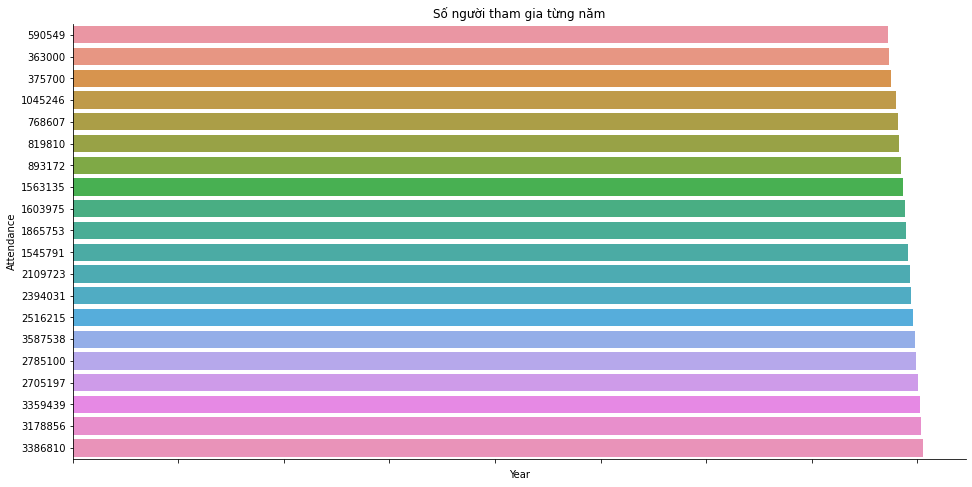

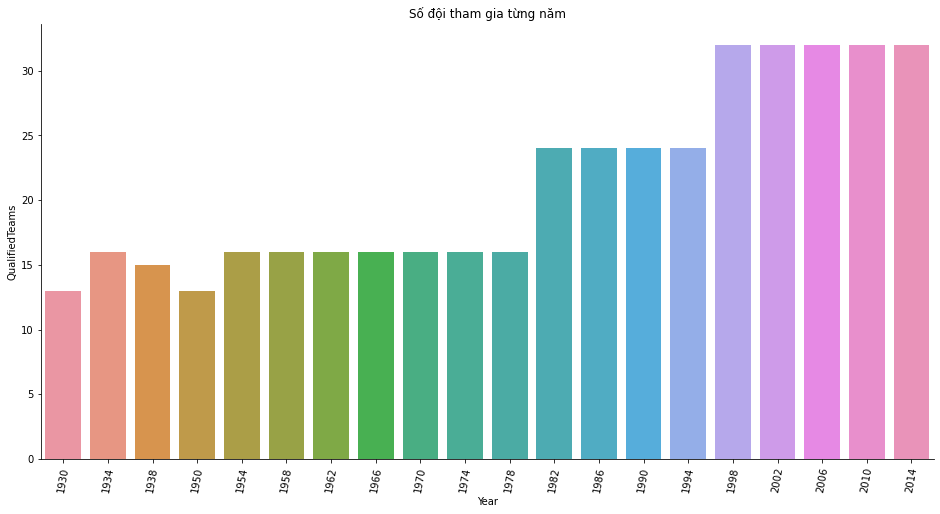

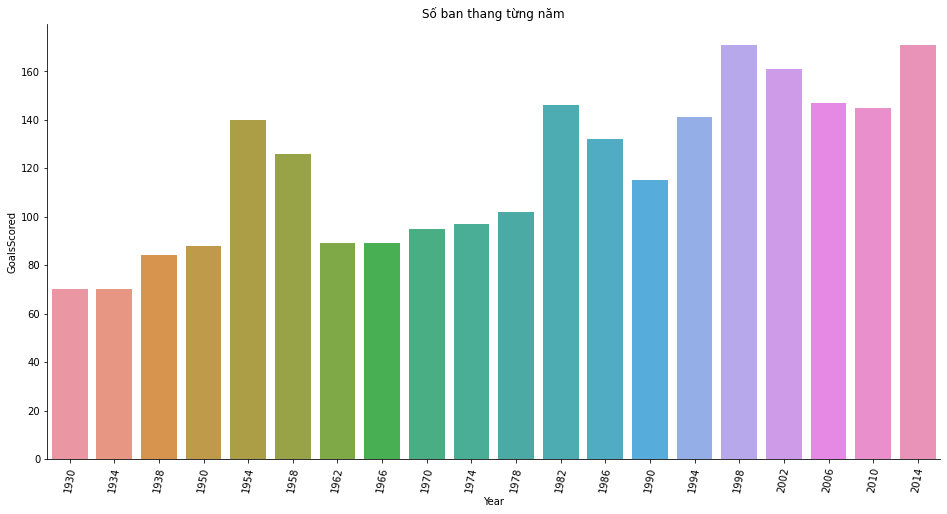

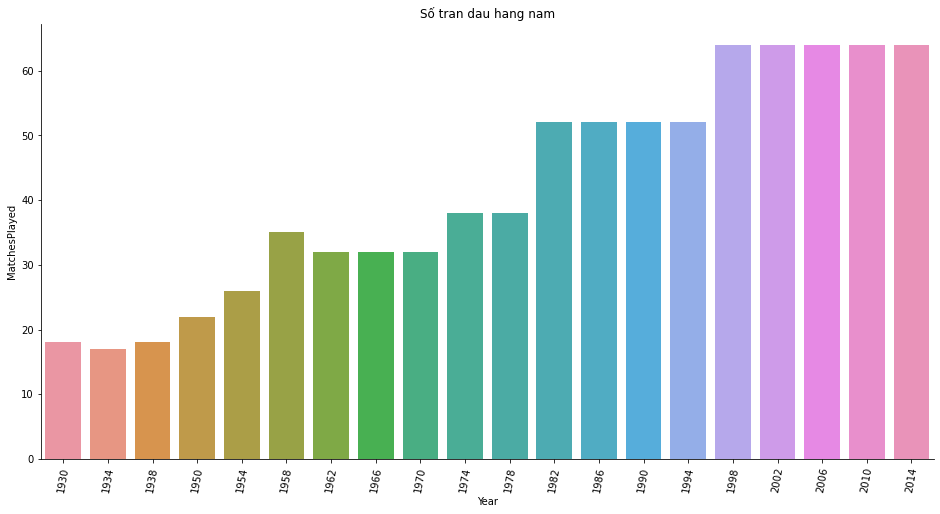

In [54]:
fig, ax = plt.subplots(figsize = (16,8))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = worldcups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Số người tham gia từng năm')


fig, ax = plt.subplots(figsize = (16,8))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = worldcups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Số đội tham gia từng năm')


fig, ax = plt.subplots(figsize = (16,8))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = worldcups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Số ban thang từng năm')


fig, ax = plt.subplots(figsize = (16,8))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = worldcups)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Số tran dau hang nam')

- Bạn cũng có thể dùng plot ly để vẽ nên biểu đồ tương tự như seaborn như sau:

In [55]:
fig = px.bar(worldcups, x = 'Year', y = 'Attendance')
fig.show()

fig = px.bar(worldcups, x = 'Year', y = 'QualifiedTeams')
fig.show()

fig = px.bar(worldcups, x = 'Year', y = 'GoalsScored')
fig.show()

## Số bàn thắng được ghi bởi mỗi đội qua mỗi kỳ World Cup

- Để làm được phần này thì chúng ta sẽ sử dụng dataset matches như sau:

In [56]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [57]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

- Nhiệm vụ của chúng ta là cần phải tổng hợp ra số bàn thắng được ghi bởi mỗi đội bóng theo từng năm là bao nhiêu?

In [58]:
home = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home 

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

- Tiếp theo ta xử lý dữ liệu Away Team Goals và Away Team Name như sau:

In [59]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

- Sau đó sẽ nối dữ liệu 2 DataFrame home và away ở trên thành 1 DataFrame duy nhất.
- Dữ liệu trên có rất nhiều dữ liệu bị trùng lặp nên ta sẽ groupby Năm và tên đội.
- Sau đó ta sẽ cộng dồn các giá trị ở cột "Số bàn thắng" với nhau.
- Cuối cùng ta tiến hành reset_index.

In [60]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals = goals.reset_index()
goals.columns = ['Year', 'Country', 'Goals']
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
...,...,...,...
422,2014.0,Russia,2.0
423,2014.0,Spain,4.0
424,2014.0,Switzerland,7.0
425,2014.0,USA,6.0


- Ta sẽ tiến hành sort_values theo số lượng bàn thắng từ lớn xuống nhỏ theo từng năm. 
- (Lưu ý cột năm sắp xếp tăng dần từ bé đến lớn, cột số bàn thắng sắp xếp giảm dần từ lớn đến bé)

In [61]:
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals.head()

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0


- Ta sẽ lọc ra top 5 số bàn thắng theo từng năm như sau:

In [62]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


- Ta sẽ dùng plotly.graph_objects để trực quan hoá dữ liệu. 
- Lệnh này ta đã khai báo ở trên nên dưới này ta không khai báo lại.
- import plotly.graph_objects as go

- Gán biến x đại diện cho cột Năm.
- Gán biến y đại diện cho cột Số bàn thắng.

In [63]:
import plotly.graph_objects as go


Tạo ra danh sách các đội bóng không trùng lặp trong DataFrame top5 bằng lệnh unique()

In [64]:
top5['Country'].unique()

array(['Argentina', 'Uruguay', 'USA', 'Yugoslavia', 'Brazil', 'Italy',
       'Germany', 'Czechoslovakia', 'Austria', 'Hungary', 'Sweden',
       'Cuba', 'Spain', 'Switzerland', 'France', 'Chile', 'Soviet Union',
       'Portugal', 'England', 'Peru', 'Mexico', 'Poland', 'Netherlands',
       'Belgium', 'Bulgaria', 'Romania', 'Croatia', 'Turkey',
       'Korea Republic', 'Colombia'], dtype=object)

- Có thể sử dụng plotly express đã rất quen thuộc với các bạn ở dưới đây:

In [65]:
fig = px.bar(top5, x = 'Year', y = 'Goals')
fig.show()